### CSCI 6330
### Group Members: Thomas, Ahmeed, Eben, Tingting

### Data preprocessing without MPI

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import process_time    #checking cpu time
from sklearn.preprocessing import MinMaxScaler   #for scaling data
#specify the scaling type
scaler =MinMaxScaler()
#get the start time


#load the data
data =pd.read_csv("tndata.csv")

#define the preprocess function
def data_process(data, scaler, cs ="yes"):
    #reverse index
    tdata=data.reindex(index=data.index[::-1])
    #get the infected 
    I=tdata['TOTAL_CONFIRMED']
    #get the recovered
    R =tdata['TOTAL_INACTIVE_RECOVERED']
    #get the length of the data
    nn =len(I)
    # show whether want to scaling
    if cs =="yes": ##indicate yes
        tt=np.linspace(0,nn, nn)
        y1 =np.array(I[:nn]).reshape((-1,1))
        y2 =np.array(R[:nn]).reshape((-1,1))
        #scaling
        II =scaler.fit_transform(y1)
        RR =scaler.fit_transform(y2)
        #plot
        plt.plot(tt, II, '--r')
        plt.plot(tt, RR, '--b')
        plt.legend(['Infected', 'Recovered'])
        plt.title('Scaled Data') 
        plt.show()
    else:  ##indicate no
        tt=np.linspace(0,nn, nn)
        II =np.array(I[:nn])
        RR =np.array(R[:nn])
        #plot
        plt.plot(tt, II, '--r')
        plt.plot(tt, RR, '--b')
        plt.legend(['Infected', 'Recovered'])
        plt.title('UnScaled Data') 
        plt.show()    
    return 



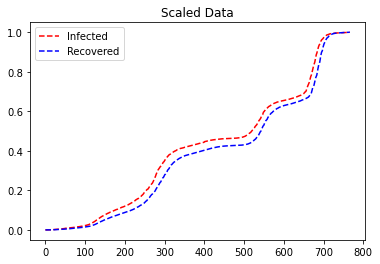

++++++++++++++++++Data Processing without MPI+++++++++++++++++++++++

CPU time for data preprocessing in seconds: 0.1545004790000002


In [2]:
start =process_time()
data_process(data, scaler, "yes")  #scaled

stop = process_time()
print("++++++++++++++++++Data Processing without MPI+++++++++++++++++++++++\n")
print("CPU time for data preprocessing in seconds:",stop-start) 

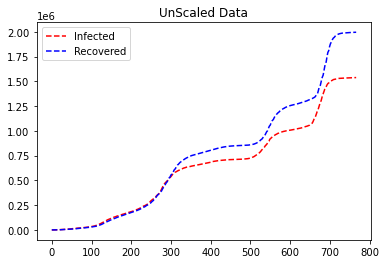

++++++++++++++++++Data Processing without MPI+++++++++++++++++++++++

CPU time for data preprocessing in seconds: 0.1224888049999997


In [3]:
start =process_time()
data_process(data, scaler, "no")  #unscaled

stop = process_time()
print("++++++++++++++++++Data Processing without MPI+++++++++++++++++++++++\n")
print("CPU time for data preprocessing in seconds:",stop-start) 

### Data preprocessing with MPI

In [4]:
%%file script.py
#!/usr/bin/env python
from mpi4py import MPI
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import process_time    #checking cpu time
from sklearn.preprocessing import MinMaxScaler 
import time

comm = MPI.COMM_WORLD
rank = comm.rank
size = comm.size
name = MPI.Get_processor_name()
if rank == 0:
    #start = process_time()
    data_process(data, scaler, "yes")  #scaled
    print("rank0 finished")
#get the start time



Overwriting script.py


In [5]:
start =process_time()

!mpiexec  -np 4 python script.py

stop = process_time()

print("++++++++++++++++++Data Processing with MPI+++++++++++++++++++++++\n")
print("CPU time for data preprocessing in seconds:",stop-start) 

--------------------------------------------------------------------------
detected:

  Local host:            hamilton03
  Device name:           mlx5_0
  Device vendor ID:      0x02c9
  Device vendor part ID: 4117

Default device parameters will be used, which may result in lower
performance.  You can edit any of the files specified by the
btl_openib_device_param_files MCA parameter to set values for your
device.

NOTE: You can turn off this warning by setting the MCA parameter
      btl_openib_warn_no_device_params_found to 0.
--------------------------------------------------------------------------
--------------------------------------------------------------------------
but there are no active ports detected (or Open MPI was unable to use
them).  This is most certainly not what you wanted.  Check your
cables, subnet manager configuration, etc.  The openib BTL will be
ignored for this job.

  Local host: hamilton03
-----------------------------------------------------------------

In [6]:
%%file script1.py
#!/usr/bin/env python
from mpi4py import MPI
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import process_time    #checking cpu time
from sklearn.preprocessing import MinMaxScaler 
import time

comm = MPI.COMM_WORLD
rank = comm.rank
size = comm.size
name = MPI.Get_processor_name()
if rank == 0:
    #start = process_time()
    data_process(data, scaler, "no")  #unscaled
    print("rank0 finished")
#get the start time


Overwriting script1.py


In [7]:
start =process_time()

!mpiexec  -np 4 python script.py

stop = process_time()

print("++++++++++++++++++Data Processing with MPI+++++++++++++++++++++++\n")
print("CPU time for data preprocessing in seconds:",stop-start) 

--------------------------------------------------------------------------
detected:

  Local host:            hamilton03
  Device name:           mlx5_0
  Device vendor ID:      0x02c9
  Device vendor part ID: 4117

Default device parameters will be used, which may result in lower
performance.  You can edit any of the files specified by the
btl_openib_device_param_files MCA parameter to set values for your
device.

NOTE: You can turn off this warning by setting the MCA parameter
      btl_openib_warn_no_device_params_found to 0.
--------------------------------------------------------------------------
--------------------------------------------------------------------------
but there are no active ports detected (or Open MPI was unable to use
them).  This is most certainly not what you wanted.  Check your
cables, subnet manager configuration, etc.  The openib BTL will be
ignored for this job.

  Local host: hamilton03
-----------------------------------------------------------------